**Import libraries required**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')

df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.shape

(200, 5)

In [4]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
df = df.drop(['Unnamed: 0'],axis=1)

df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


we have drop the column Unnamed : 0 because it is not required for our model building process.

In [7]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

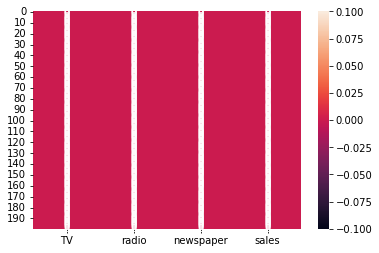

In [8]:
sns.heatmap(df.isnull(),annot=True)


There are no missing values present in the data.

**Understand the data**

In [9]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


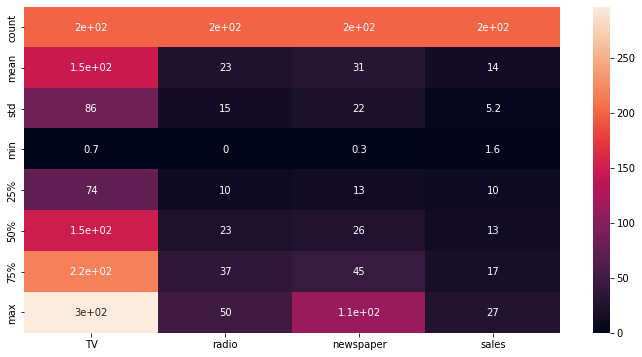

In [10]:
plt.figure(figsize=(12,6))
sns.heatmap(df.describe(),annot=True)

**Univariate Analysis**

1)Density Plots

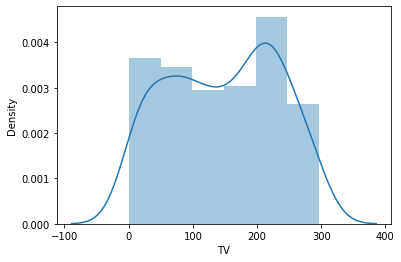

In [11]:
sns.distplot(df['TV'])

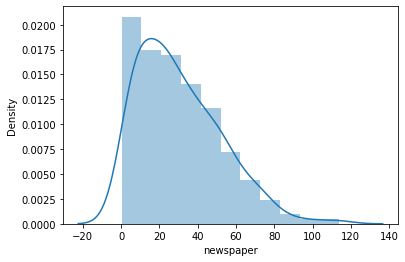

In [12]:
sns.distplot(df['newspaper'])

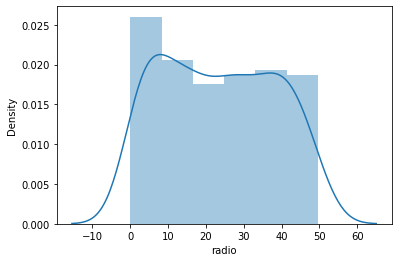

In [13]:
sns.distplot(df['radio'])

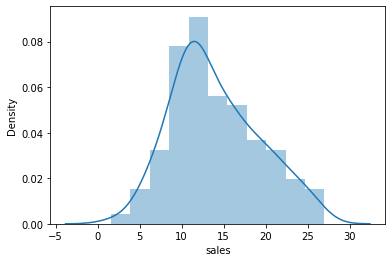

In [14]:
sns.distplot(df['sales'])

2)Strip Plot

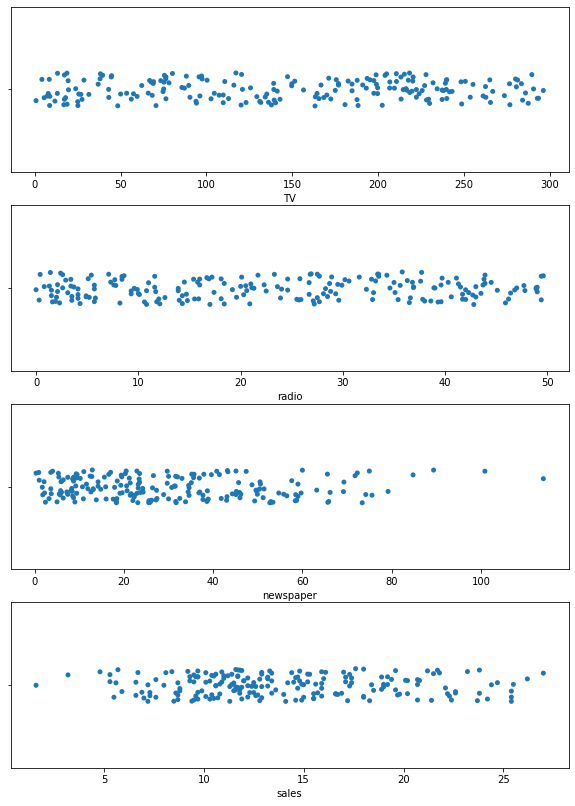

In [15]:
plt.figure(figsize=(10,14),facecolor='white')
pn = 1

for column in df:
    if pn <= 4:
        ax = plt.subplot(4,1,pn)
        sns.stripplot(df[column])        
    pn +=1
plt.show()

3)Histogram

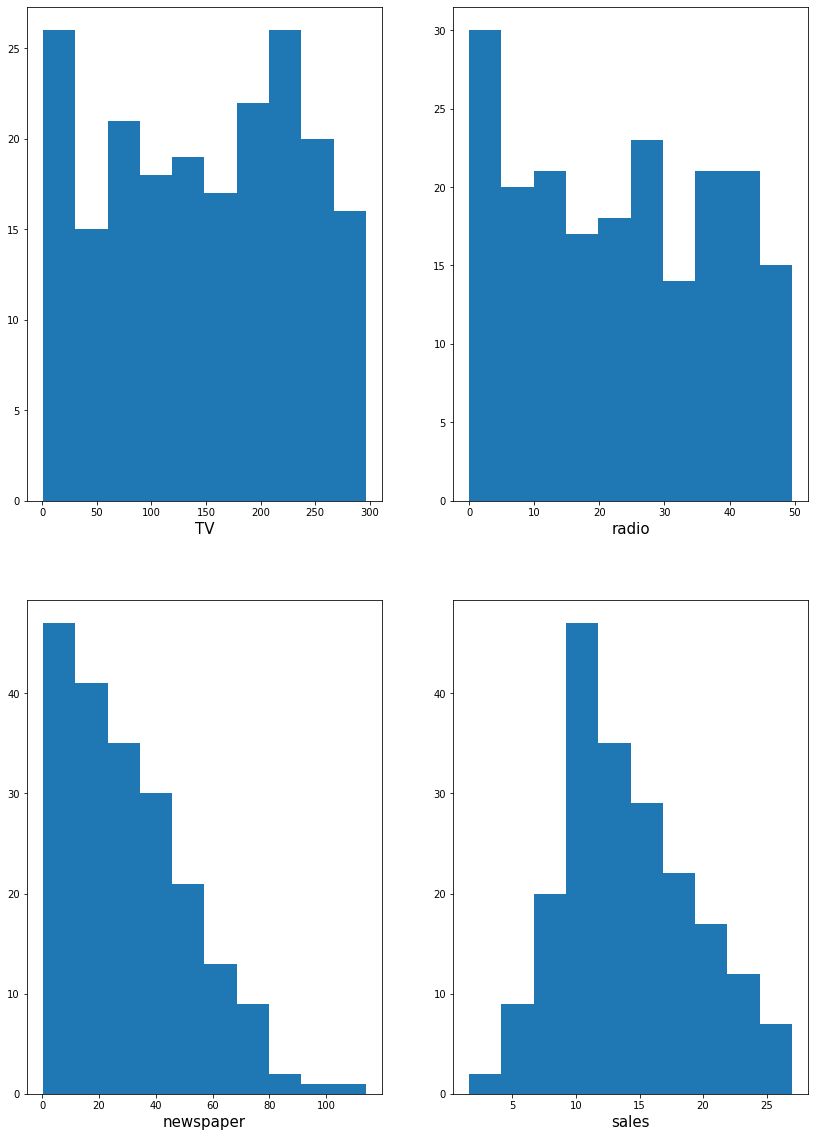

In [16]:
plt.figure(figsize=(14,20),facecolor='white')
pn = 1

for column in df:
    if pn <= 4:
        ax = plt.subplot(2,2,pn)
        plt.hist(df[column])
        plt.xlabel(column,fontsize=15)        
    pn +=1
plt.show()

In [17]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

4)Boxplot

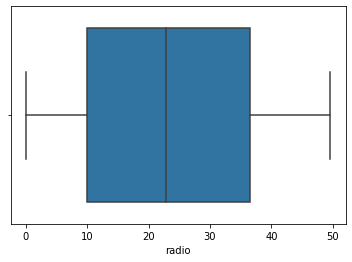

In [18]:
sns.boxplot(df['radio'])

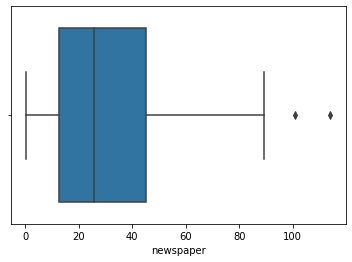

In [19]:
sns.boxplot(df['newspaper'])

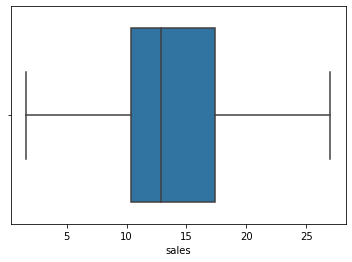

In [20]:
sns.boxplot(df['sales'])

The boxplot method shows the distribution of the data to check for any outliers.
['Newspaper'] column shows some outliers , so we will fix them.

**IQR Method**

In [21]:
q1 = df['newspaper'].quantile(0.25)

q3 = df['newspaper'].quantile(0.75)

print(q1)
print(q3)

12.75
45.1


In [22]:
iqr = q3 - q1

iqr

32.35

In [23]:
newspaper = (q3 + (1.5 * iqr))

newspaper

93.625

In [24]:
index = np.where(df['newspaper'] > newspaper)

index

(array([ 16, 101]),)

In [25]:
df = df.drop(df.index[index])

df.shape

(198, 4)

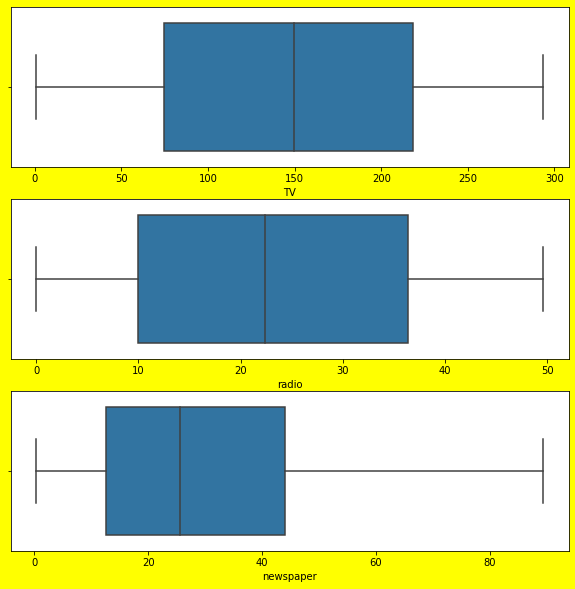

In [26]:
plt.figure(figsize=(10,10),facecolor='yellow')
pn = 1

for column in df:
    if pn <= 3:
        ax = plt.subplot(3,1,pn)
        sns.boxplot(df[column])        
    pn +=1
plt.show()

The newspaper column has been treated with iqr method to fix the outliers.

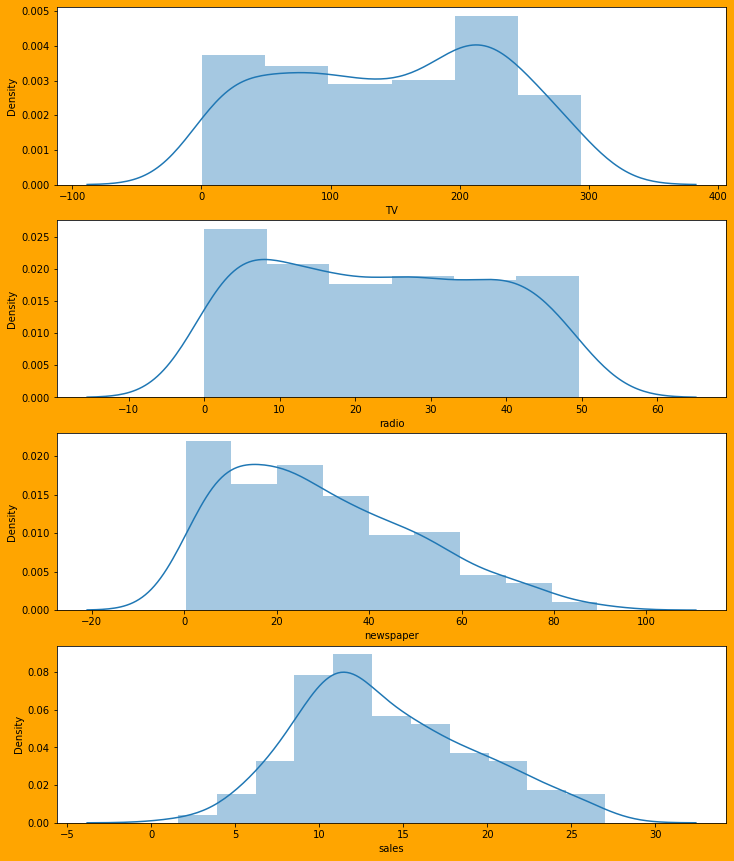

In [27]:
plt.figure(figsize=(12,15),facecolor='orange')
pn = 1

for column in df:
    if pn <= 4:
        ax = plt.subplot(4,1,pn)
        sns.distplot(df[column])        
    pn +=1
plt.show()

In [28]:
df.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

**Correlation Matrix**

In [29]:
df_corr = df.corr()

df_corr

,TV,radio,newspaper,sales
TV,1.000000,0.051978,0.049771,0.779121
radio,0.051978,1.000000,0.346364,0.576748
newspaper,0.049771,0.346364,1.000000,0.219555
sales,0.779121,0.576748,0.219555,1.000000


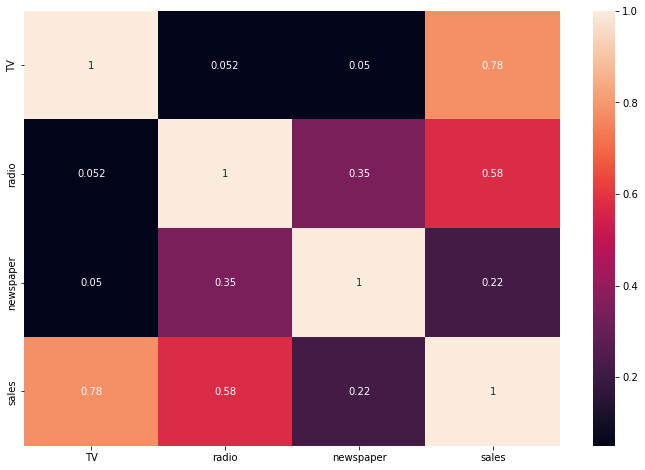

In [30]:
plt.figure(figsize=(12,8))
sns.heatmap(df_corr,annot=True)


**Bivariate Analysis**

In [31]:
X = df[['TV','radio','newspaper']]
Y = df['sales']

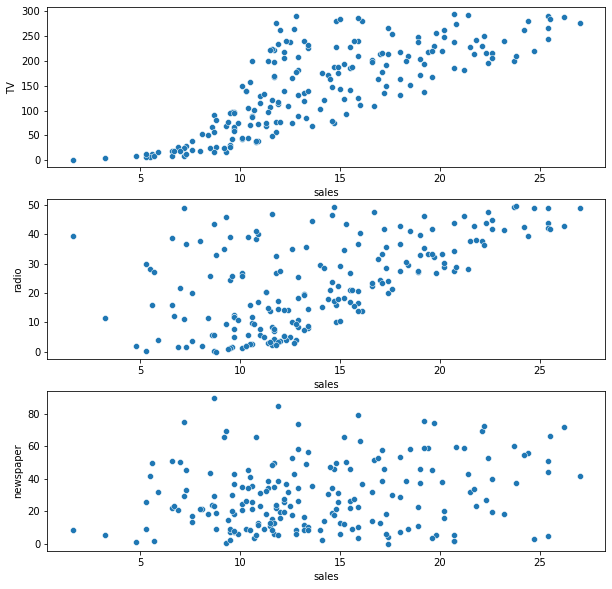

In [32]:
plt.figure(figsize=(10,10),facecolor='white')
pn = 1

for column in X:
    if pn <= 3:
        ax = plt.subplot(3,1,pn)
        sns.scatterplot(Y,X[column])        
    pn +=1
plt.show()

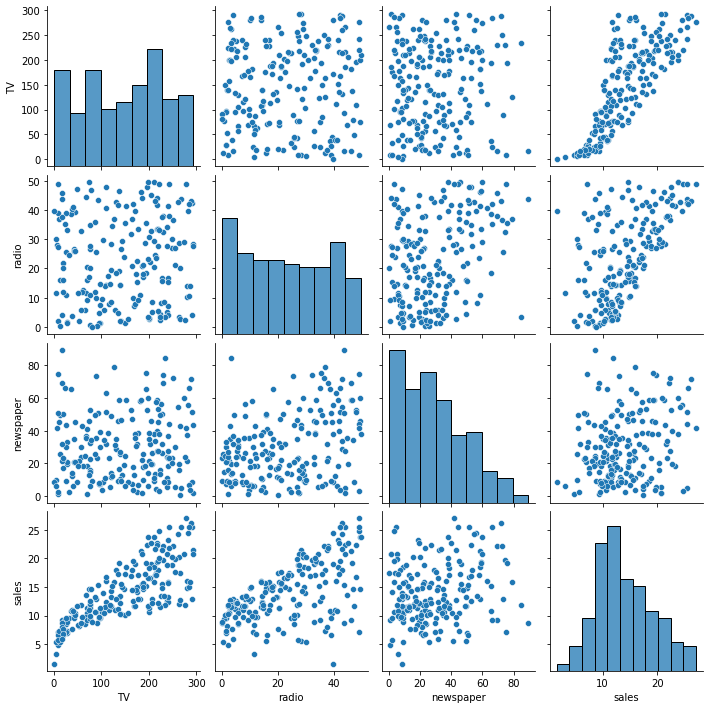

In [33]:
#Pairplot
sns.pairplot(df)

**Scaling Variables**

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_Scaled = scaler.fit_transform(X)

X_Scaled

array([[ 0.97869734,  0.98952135,  1.93299778],
       [-1.19901165,  1.09070498,  0.75131275],
       [-1.51933199,  1.53591293,  1.93790103],
       [ 0.05645636,  1.22561648,  1.40834924],
       [ 0.40024339, -0.83178391,  1.40344598],
       [-1.61906543,  1.73828018,  2.2173867 ],
       [-1.04647815,  0.6522426 , -0.30779084],
       [-0.31079737, -0.23817331, -0.89127846],
       [-1.62023876, -1.41864895, -1.41102374],
       [ 0.62317696, -1.38492107, -0.42056576],
       [-0.94557138, -1.16906267, -0.27346804],
       [ 0.79800381,  0.05863199, -1.26392602],
       [-1.44189191,  0.80739083,  1.77119028],
       [-0.57714432, -1.04764232, -1.10702179],
       [ 0.67363035,  0.65898817,  0.79544207],
       [ 0.57155024,  1.65733328,  1.13376683],
       [ 1.58061798,  1.1109417 ,  1.27596129],
       [-0.90919801, -0.17746313, -0.56276022],
       [ 0.0071763 ,  0.05188642, -0.52353416],
       [ 0.84141719,  0.30821827,  1.15828311],
       [ 1.06435076, -1.21628169, -0.307

**Checking for Multicollinearity**

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X_Scaled,i) for i in range(X_Scaled.shape[1])]
vif['features'] = X.columns

vif

,vif,features
0,1.003863,TV
1,1.137887,radio
2,1.137631,newspaper


**Model Building**

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

**Linear Regression**

In [48]:
best_rstate=0
accu=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.25,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    a=r2_score(y_test,y_pred)
    
    if a>accu:
        accu=a
        best_rstate=i
        
        
print('Best accuracy is ',(accu*100),'found on random state',(best_rstate))

Best accuracy is  94.50468735016784 found on random state 90


In [49]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.25,random_state=90)
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
lr_acc = r2_score(y_test,y_pred)*100
print("R2 Score : ",lr_acc)
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_pred))
print("Mean Square Error : ",mean_squared_error(y_test,y_pred))
print("Root Mean Square Error : ",np.sqrt(mean_squared_error(y_test,y_pred)))
K_Fold = KFold(10)
print("Cross Val Score : ",cross_val_score(lr,X_Scaled,Y,cv=K_Fold).mean())


R2 Score :  94.50468735016784
Mean Absolute Error :  0.9729556709260027
Mean Square Error :  1.4561004664512296
Root Mean Square Error :  1.2066898799821062
Cross Val Score :  0.8852342593723449


**Decision Tree**

In [50]:
best_rstate=0
accu=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.25,random_state=i)
    dt=DecisionTreeRegressor()
    dt.fit(x_train,y_train)
    y_pred_1=dt.predict(x_test)
    a=r2_score(y_test,y_pred_1)
    
    if a>accu:
        accu=a
        best_rstate=i
        
        
print('Best accuracy is ',(accu*100),'found on random state',(best_rstate))

Best accuracy is  97.64291627551572 found on random state 192


In [51]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.25,random_state=192)
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred_1=dt.predict(x_test)
dt_accu = r2_score(y_test,y_pred_1)*100
print("R2 Score : ",dt_accu)
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_pred_1))
print("Mean Square Error : ",mean_squared_error(y_test,y_pred_1))
print("Root Mean Square Error : ",np.sqrt(mean_squared_error(y_test,y_pred_1)))
K_Fold = KFold(10)
print("Cross Val Score : ",cross_val_score(dt,X_Scaled,Y,cv=K_Fold).mean())

R2 Score :  95.75753006825997
Mean Absolute Error :  0.8439999999999999
Mean Square Error :  1.2088
Root Mean Square Error :  1.0994544101507802
Cross Val Score :  0.9493755743513882


**Random Forest**

In [52]:
best_rstate=0
accu=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.25,random_state=i)
    rf=RandomForestRegressor()
    rf.fit(x_train,y_train)
    y_pred_2=rf.predict(x_test)
    a=r2_score(y_test,y_pred_2)
    
    if a>accu:
        accu=a
        best_rstate=i
        
        
print('Best accuracy is ',(accu*100),'found on random state',(best_rstate))

Best accuracy is  98.81901272476144 found on random state 74


In [53]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.25,random_state=74)
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred_2=rf.predict(x_test)
rf_accu = r2_score(y_test,y_pred_2)*100
print("R2 Score : ",rf_accu)
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_pred_2))
print("Mean Square Error : ",mean_squared_error(y_test,y_pred_2))
print("Root Mean Square Error : ",np.sqrt(mean_squared_error(y_test,y_pred_2)))
K_Fold = KFold(10)
print("Cross Val Score : ",cross_val_score(rf,X_Scaled,Y,cv=K_Fold).mean())

R2 Score :  98.49239121748016
Mean Absolute Error :  0.597519999999998
Mean Square Error :  0.5229207999999991
Root Mean Square Error :  0.723132629605385
Cross Val Score :  0.9781164521050737


**Hyper Parameter Tuning**

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
param_grid = {  'bootstrap': [True], 
                'max_depth': [5, 10, None], 
                'max_features': ['auto', 'log2','sqrt'], 
                'n_estimators': [50,100,150,200],
                'min_samples_leaf' : [1,2,3]
             }
rf_hyper=GridSearchCV(rf,param_grid,cv=5,n_jobs=1,verbose=0)
rf_hyper.fit(x_train,y_train)
print(rf_hyper.best_params_)

{'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 200}


In [54]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.25,random_state=74)
rf=RandomForestRegressor(bootstrap=True,max_depth=None,max_features='auto',min_samples_leaf=1,n_estimators=50)
rf.fit(x_train,y_train)
y_pred_2=rf.predict(x_test)
rf_accu = r2_score(y_test,y_pred_2)*100
print("R2 Score : ",rf_accu)
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_pred_2))
print("Mean Square Error : ",mean_squared_error(y_test,y_pred_2))
print("Root Mean Square Error : ",np.sqrt(mean_squared_error(y_test,y_pred_2)))
K_Fold = KFold(10)
print("Cross Val Score : ",cross_val_score(rf,X_Scaled,Y,cv=K_Fold).mean())

R2 Score :  98.49818246524393
Mean Absolute Error :  0.5891599999999986
Mean Square Error :  0.520912079999998
Root Mean Square Error :  0.7217423917160457
Cross Val Score :  0.9777362928847498


In [46]:
import pickle

filename = 'Advertising_Sales_Channel_Prediction.pkl'

pickle.dump(rf,open(filename,'wb'))